<a href="https://colab.research.google.com/github/ykato27/Optimization/blob/main/%E3%83%8B%E3%83%A5%E3%83%BC%E3%83%A9%E3%83%AB%E3%83%8D%E3%83%83%E3%83%88%E3%81%AE%E3%83%9B%E3%83%83%E3%83%97%E3%83%95%E3%82%A3%E3%83%BC%E3%83%AB%E3%83%89%E3%83%A2%E3%83%87%E3%83%AB%E3%81%AB%E3%82%88%E3%82%8B%E7%B5%84%E3%81%BF%E5%90%88%E3%82%8F%E3%81%9B%E6%9C%80%E9%81%A9%E5%8C%96%E5%95%8F%E9%A1%8C%E3%82%92%E8%A7%A3%E3%81%8F%E3%83%AC%E3%82%B7%E3%83%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

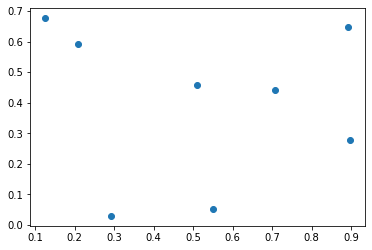

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#パラメーター
N = 8  #都市数
A = 10 #都市は一度のみ制約条件
B = 10 #都市は同時に一度のみ
D = 50 #距離

#都市を作成
np.random.seed(seed=3)
dx = np.random.rand(N)
dy = np.random.rand(N)

#print(dx,dy)
#都市の表示
plt.scatter(dx,dy)
plt.show()

In [2]:
#plt.pause(0.1)
#ニューロンの作成
#x = np.zeros((N , N))
x = np.random.rand(N,N)#ニューロンの出力
u = np.zeros((N,N))    #内部状態
u_tmp = np.zeros((N,N))#内部状態一時保管
b = np.zeros((N,N)) #バイアス
dt = 0.1    #時刻刻み
tau= 1    #時定数
w = np.zeros((N,N,N,N)) #結合重み

#順路表示
def calc_disp():
    for i in range(N):
        for j in range(N):
            if(u[i,j]>0.9):
                x[i,j]=1
            else:
                x[i,j]=0

    ans_x = np.zeros(N+1)
    ans_y = np.zeros(N+1)
    for i in range(N):
        for j in range(N):
            if(x[j,i]==1):
                ans_x[i] = dx[j]
                ans_y[i] = dy[j]
                break
    ans_x[N] = ans_x[0]
    ans_y[N] = ans_y[0]
    plt.plot(ans_x,ans_y)
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp


[[4.12726038e-133 6.99188924e-048 2.63910681e-211 9.43749893e-047
  2.48897102e-127 3.77455246e-166 3.01986268e-174 1.00230796e-120]
 [1.00000000e+000 1.00000000e+000 3.37112280e-123 3.85052366e-082
  2.00784255e-132 1.31932296e-186 1.10666669e-217 5.01315780e-178]
 [8.66909355e-202 2.11903805e-083 8.46334510e-275 1.73671090e-063
  1.31919052e-193 1.89780191e-197 9.91986473e-150 7.03090416e-105]
 [1.07547996e-122 8.08948158e-082 9.99999108e-001 1.00000000e+000
  6.14516246e-131 7.08703862e-183 1.11978914e-152 5.40695303e-136]
 [2.79691263e-074 4.89536230e-018 5.41603050e-192 6.95962365e-047
  3.42408446e-121 2.95515094e-160 3.52066621e-191 9.71995638e-132]
 [2.78940578e-103 1.00747122e-052 5.89635455e-226 2.62114300e-090
  7.89656733e-001 1.64771056e-145 1.63556663e-255 6.30660058e-188]
 [1.45534637e-262 4.28306572e-136 0.00000000e+000 2.87199493e-097
  2.21314643e-273 1.18619745e-139 1.48437055e-039 1.00000000e+000]
 [2.05385830e-242 1.17543407e-136 9.68632692e-267 1.32587632e-096
  2

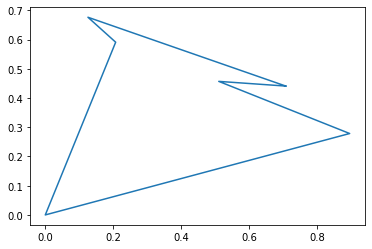

In [3]:
#クロネッカーのデルタ
def delta(i,j): 
    if(i == j):
        return 1
    else:
        return 0
#距離計算    
def dist(x,y):
    if(x==y):
        return 0
    else:
        d = np.sqrt(np.square(dx[x] - dx[y]) + np.square(dy[x] - dy[y]))
        return d

#活性化関数
def f(x):
    #return x
    return 1.0 / (1.0 + np.exp(-0.1*x))
    #return 0.5*(1 - np.tanh(x))

#ニューロンの更新
def update():
    for i in range(N):
        for j in range(N):
            u_tmp = u[i,j]
            u[i,j] = 0
            for k in range(N):
                for l in range(N):
                    u[i,j] +=  w[i,j,k,l] * x[k,l]
            u[i,j] += b[i,j]
            u[i,j] = u[i,j]*dt + u_tmp/tau
            x[i,j] = f(u[i,j])

#重みとバイアスの定義
for i in range(N):
    for j in range(N):
        for m in range(N):
            for n in range(N):
                w[i,j,m,n] = -A*delta(i,m)*(1-delta(j,n)) - B * delta(j,n)*(1-delta(i,m)) -D * dist(i,m)*(delta(m,j+1)+delta(n,j-1))
        b[i,j] = A+B
        
#動作
for i in range(1000):
    update() #全ニューロンを一回ずつ更新
    
#結果の表示
print(x)
calc_disp()